In [1]:
import numpy as np
import pandas as pd
import math

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
## data info:
#This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
#X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
#X2: Gender (1 = male; 2 = female). 
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#X4: Marital status (1 = married; 2 = single; 3 = others). 
#X5: Age (year). 
#X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
#X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
#X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

data = pd.read_csv('bank-data.csv', sep = ';') 

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

There's no missing data, but everything is set as ints. This doesnt seem right

In [5]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64



From the data above, we can see that there are multiple categorical variables. Job, marital, education, default, housing, loan, contact, month, day_of_week, and poutcome are all categorical variables and will require dummy variables

In [6]:
data = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first = True)

In [7]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [8]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data)

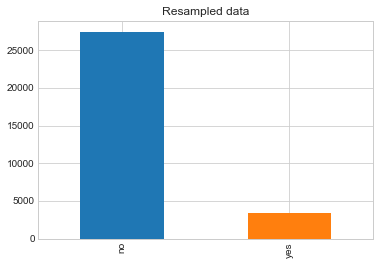

In [10]:
countNo, _ = train.y.value_counts()
countData = len(train)
train.y.value_counts().plot(kind = 'bar', title = 'Resampled data')

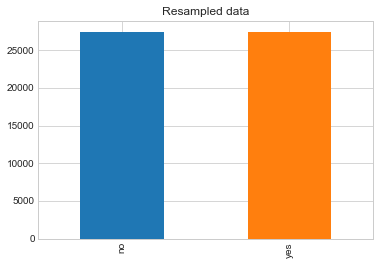

In [11]:
type(train)
Yes = train.loc[train.y =='yes']
No = train.loc[train.y == 'no']
YesOver = Yes.sample(countNo, replace = True)
train = pd.concat([YesOver, No], axis = 0)
train.y.value_counts().plot(kind='bar', title='Resampled data');


In [12]:
x_train = train.loc[:, train.columns !='y']
y_train = np.ravel(train.y.map({'yes':1, 'no':0}))
x_test = test.loc[:, test.columns !='y']
y_test = np.ravel(test.y.map({'yes':1, 'no':0}))

In [15]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler();
scaled_train  = pd.DataFrame(scale.fit_transform(x_train),columns = x_train.columns)
scaled_test  = pd.DataFrame(scale.transform(x_test),columns = x_test.columns)

scaled_train.shape

(54932, 53)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.8)
scaled_train=pca.fit_transform(scaled_train)
scaled_test=pca.transform(scaled_test)
scaled_train.shape

(54932, 25)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [20]:
def tune (model, params, kfold):
    grid = GridSearchCV(model, params, verbose = 2, cv = kfold, scoring = 'roc_auc', n_jobs = -1)
    grid.fit(scaled_train, y_train)
    best_params = grid.best_params_
    return best_params

In [21]:
def perf (model):
    model.fit(scaled_train, y_train)
    y_train_pred = model.predict(scaled_train)
    y_test_pred = model.predict(scaled_test)
    roc_auc_train = round(roc_auc_score(y_train, y_train_pred),3)
    roc_auc_test = round(roc_auc_score(y_test, y_test_pred),3)
    return roc_auc_train, roc_auc_test

In [22]:
def graph(title, xlabel, ylabel, results):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(results[0], results[1], label='Training Data');
    ax.plot(results[0], results[2], label = 'Test Data');
    plt.legend();
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

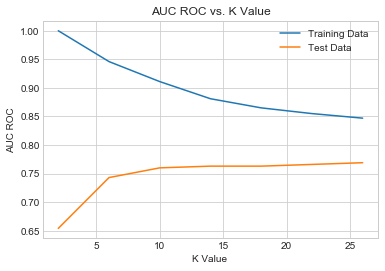

In [23]:
from sklearn.neighbors import KNeighborsClassifier
results = []
for i in range(2,30,4):
    KNN = KNeighborsClassifier(n_neighbors = i)
    roc_auc_train, roc_auc_test = perf(KNN)
    results.append([i,roc_auc_train, roc_auc_test])
results = pd.DataFrame(results)

graph("AUC ROC vs. K Value","K Value ","AUC ROC", results);

In [44]:
results.columns = ['max_depth', 'train_auc_roc', 'test_auc_roc']
best_k = results['test_auc_roc'].idxmax()
print(best_k)

6


10
20
30
40
50
60
70
80


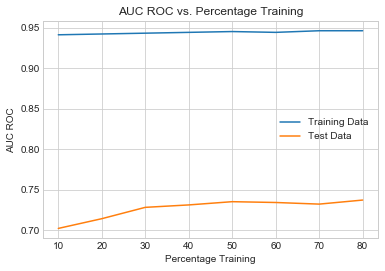

In [42]:
KNN_with_best_para = KNeighborsClassifier(n_neighbors = best_k)

plot=[]
for i in range (10,90,10):
    train, test = train_test_split(data, train_size = i/100, random_state=1)    
    countNo, _ = train.y.value_counts()
    countData = len(train)
    Yes = train.loc[train.y =='yes']
    No = train.loc[train.y == 'no']
    YesOver = Yes.sample(countNo, replace = True)
    train = pd.concat([YesOver, No], axis = 0)
    x_train = train.loc[:, train.columns !='y']
    y_train = np.ravel(train.y.map({'yes':1, 'no':0}))
    x_test = test.loc[:, test.columns !='y']
    y_test = np.ravel(test.y.map({'yes':1, 'no':0}))
    scaled_train= pd.DataFrame(scale.fit_transform(x_train),columns = x_train.columns)
    scaled_test = pd.DataFrame(scale.transform(x_test),columns = x_test.columns)
    scaled_train=pca.transform(scaled_train)
    scaled_test=pca.transform(scaled_test)
    roc_auc_train, roc_auc_test = perf(KNN_with_best_para)
    plot.append([i,roc_auc_train, roc_auc_test])
    print(i)
plot = pd.DataFrame(plot)

graph("AUC ROC vs. Percentage Training","Percentage Training","AUC ROC", plot);



In [40]:
x_train.shape

(7348, 53)

In [43]:
plot.columns = ['Percentage Training', 'Training AUC ROC', 'Testing AUC ROC']
print(plot)

   Percentage Training  Training AUC ROC  Testing AUC ROC
0                   10             0.941            0.702
1                   20             0.942            0.714
2                   30             0.943            0.728
3                   40             0.944            0.731
4                   50             0.945            0.735
5                   60             0.944            0.734
6                   70             0.946            0.732
7                   80             0.946            0.737
